#Task 3

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay




In [ ]:
data = pd.read_csv('/content/bank.csv')
data



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
data.shape

(11162, 17)

In [ ]:
x = data.drop(['deposit'] , axis=1 )
y = data['deposit']

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


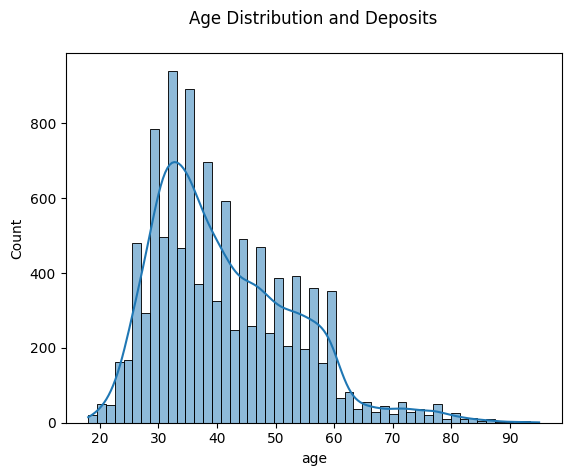

In [ ]:
sns.histplot(x="age", data=data, kde=True)
plt.title("Age Distribution and Deposits\n")
plt.show()

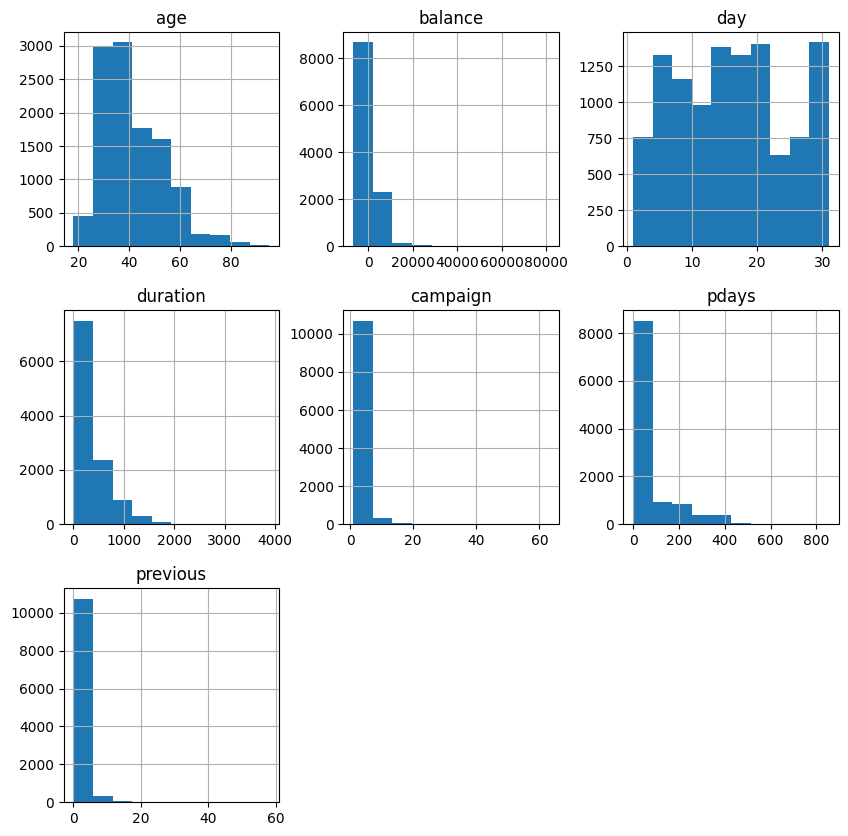

In [ ]:
data.hist(figsize=(10, 10))
plt.show()


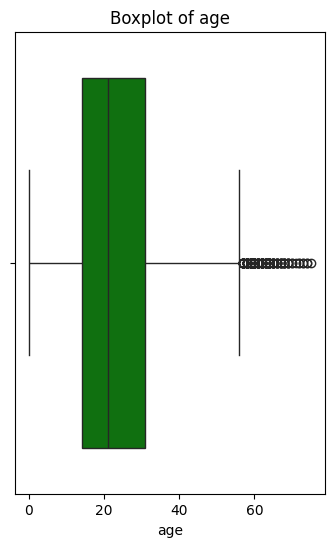

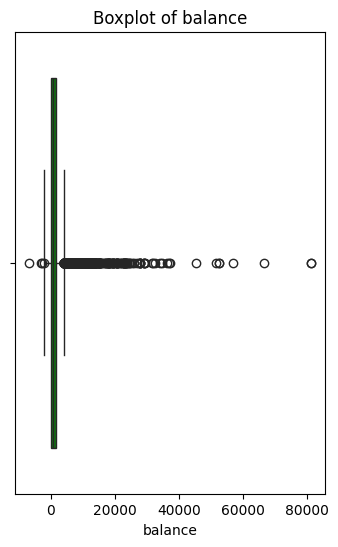

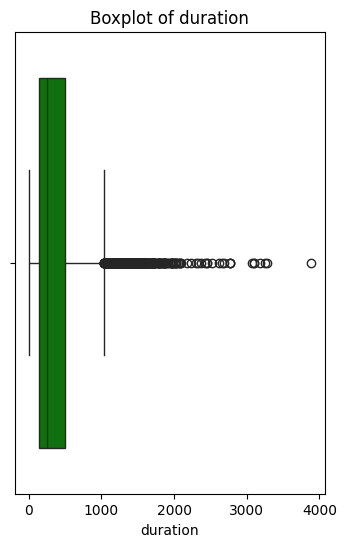

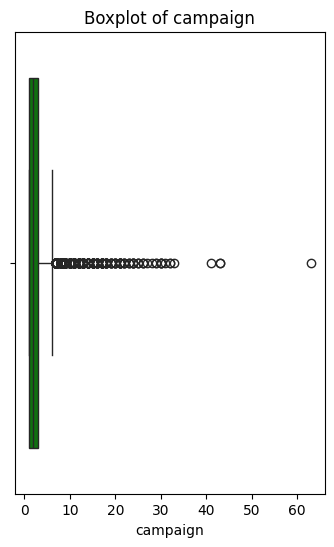

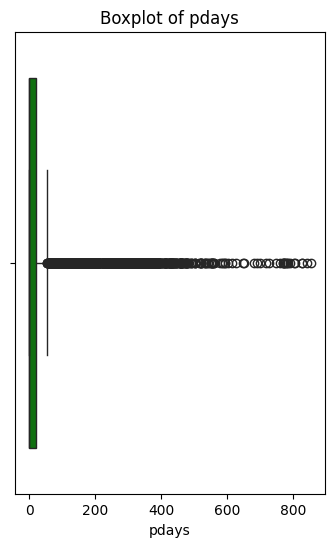

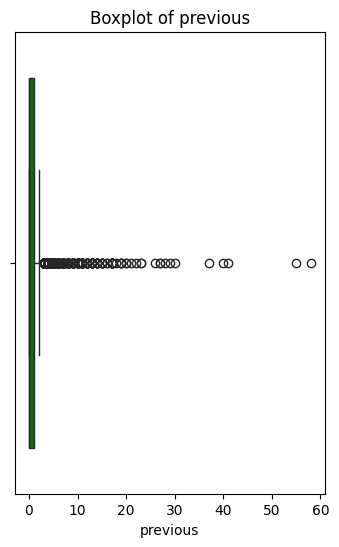

In [ ]:
# Assuming you have identified numerical features in your dataset and stored them in 'num_cols' list
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for feature in num_cols:
    plt.figure(figsize=(4, 6))  # Adjust the figure size as per your preference
    sns.boxplot(x=feature, data=data, color='Green')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Function to remove outliers using IQR method
def remove_outliers(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Remove outliers from the dataset
cleaned_data = remove_outliers(data, num_cols)

In [ ]:
# Check the shape of the cleaned dataset
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", cleaned_data.shape)

Original dataset shape: (11162, 17)
Cleaned dataset shape: (6557, 17)


after removing outliers

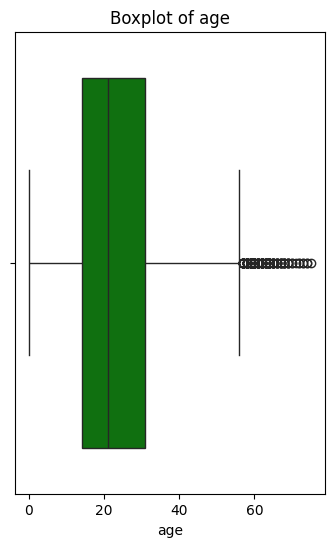

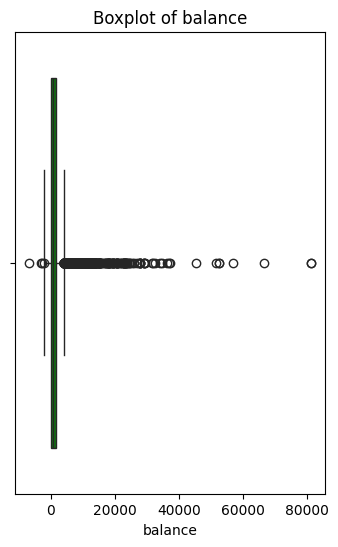

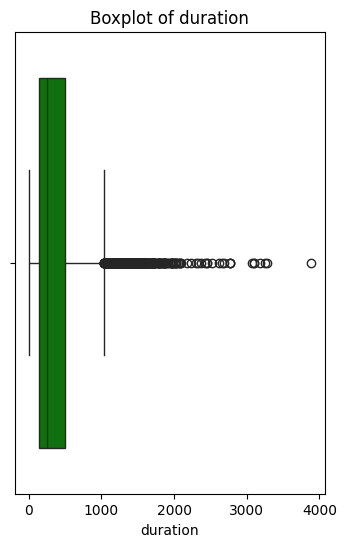

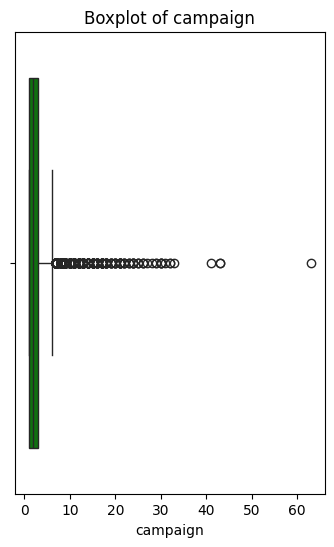

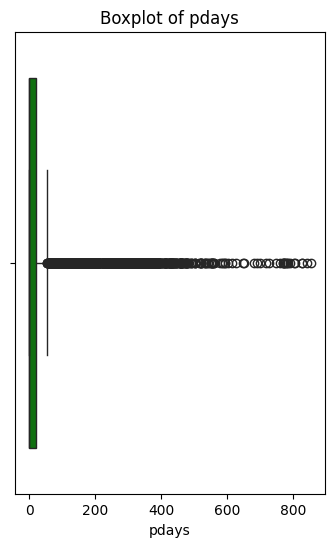

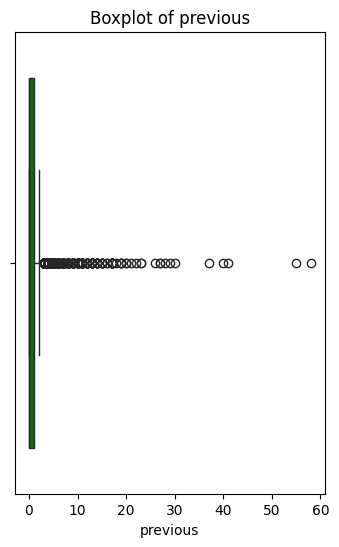

In [ ]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for feature in num_cols:
    plt.figure(figsize=(4, 6))  # Adjust the figure size as per your preference
    sns.boxplot(x=feature, data=data, color='Green')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

<ipython-input-41-394aed681c67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


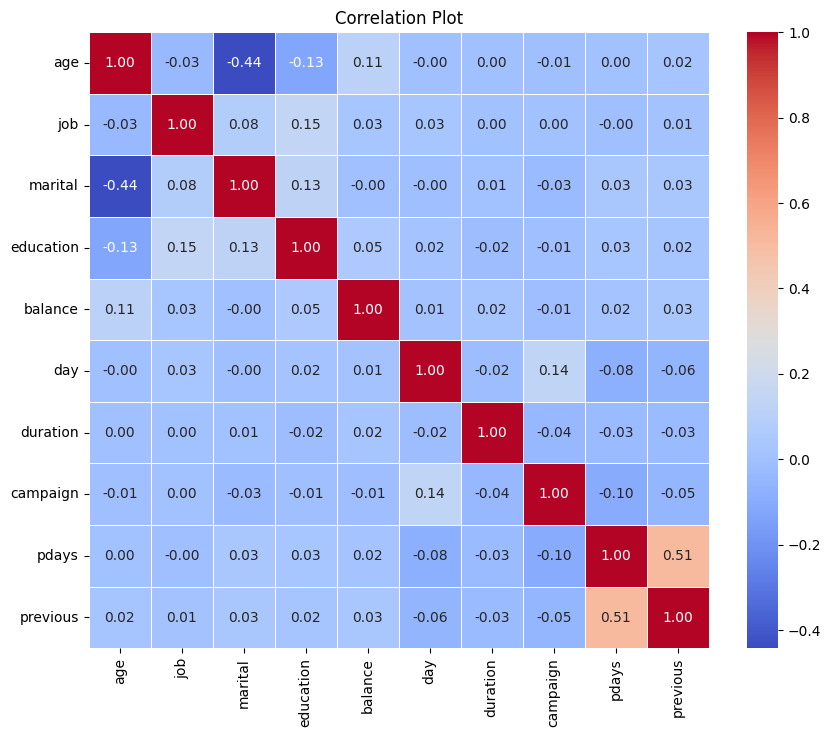

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

selecting dep and indep var

In [ ]:
# Assuming the target variable is named 'y'
target_variable = 'y'


In [ ]:
# Assuming you have identified the independent variables in your dataset and stored them in a list named 'independent_variables'
independent_variables = ['age', 'job', 'education', 'marital', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Extract the selected features from the dataset
X = data[independent_variables]
y = data['deposit']




In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7201074787281684


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained predictions
y_true = model.predict(X_test)  # Actual labels
y_pred = model.predict(X_test)  # Predicted labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1217    0]
 [   0 1016]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)




DecisionTreeClassifier()

In [ ]:
# Use the trained classifier to make predictions on the testing data
y_pred = clf.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.7089117778772951


In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[840 326]
 [324 743]]


In [ ]:

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          no       0.72      0.72      0.72      1166
         yes       0.70      0.70      0.70      1067

    accuracy                           0.71      2233
   macro avg       0.71      0.71      0.71      2233
weighted avg       0.71      0.71      0.71      2233



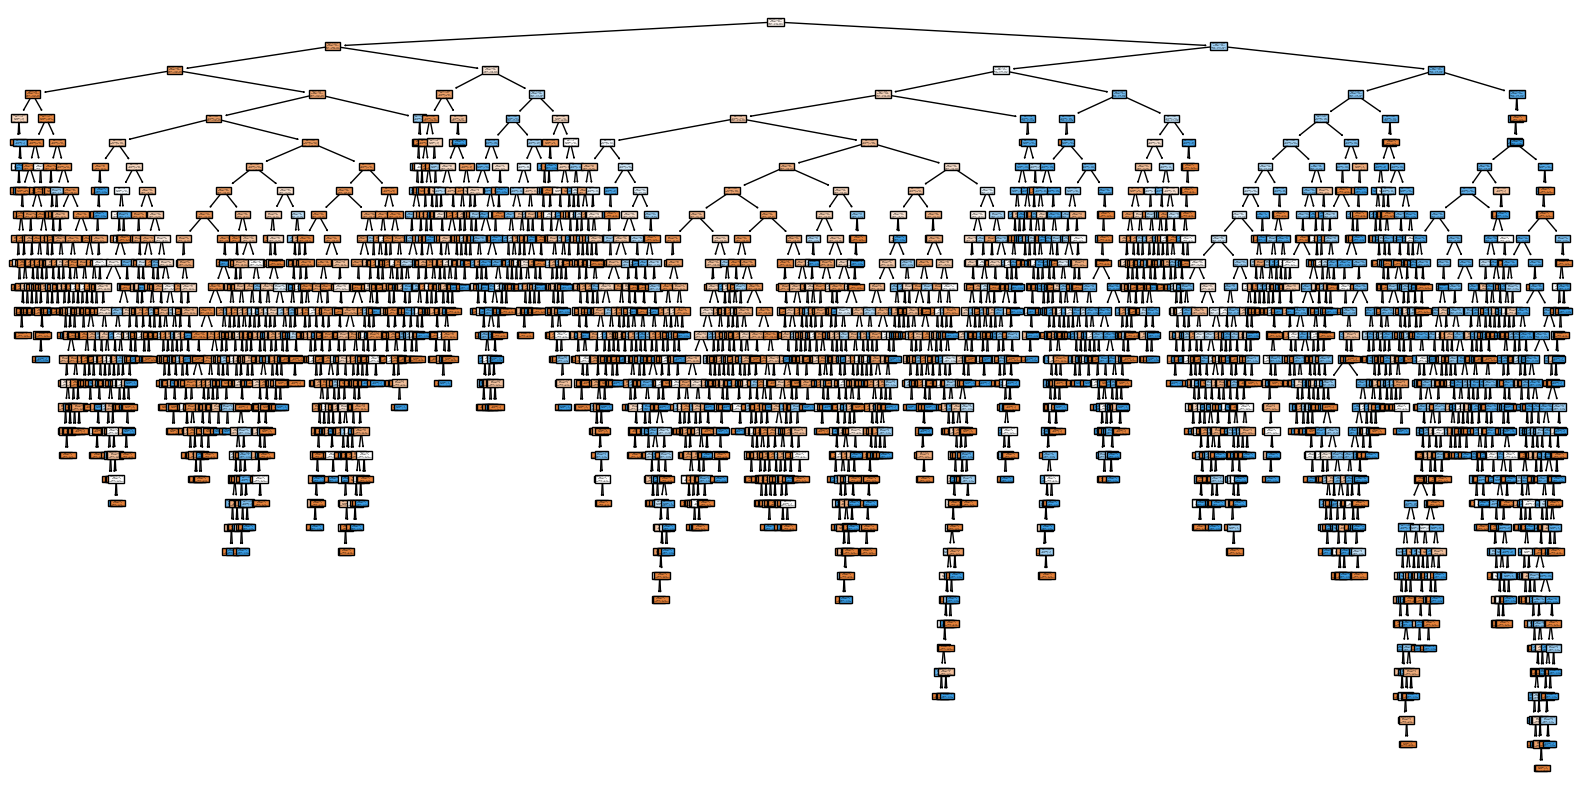

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.show()


tree 2

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier with max_depth parameter
clf = DecisionTreeClassifier(max_depth=3)

# Train the classifier on the training data
clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate training accuracy
train_accuracy = clf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate testing accuracy
test_accuracy = clf.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)



Training Accuracy: 0.7710829880165752
Testing Accuracy: 0.7577250335871025


In [ ]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
[[921 245]
 [296 771]]
Classification Report:
              precision    recall  f1-score   support

          no       0.76      0.79      0.77      1166
         yes       0.76      0.72      0.74      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233

Accuracy: 0.7577250335871025


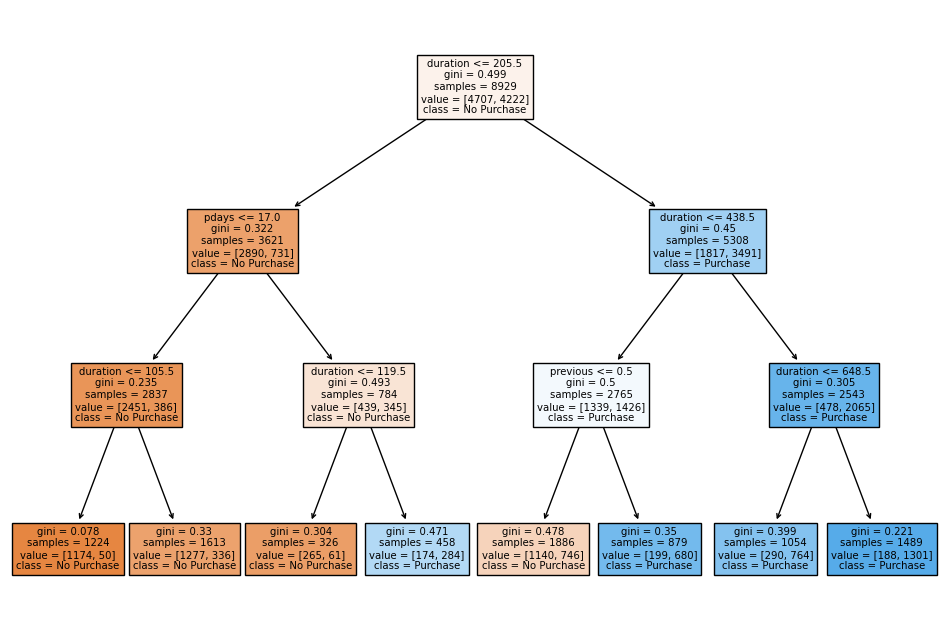

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.show()
